<a href="https://colab.research.google.com/github/AnthonyValenti/Customer-Churn-Predictor/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Predictor**
Utilizing a dataset from Kaggle and a logistic regression model this project predicts if a customer will renew or cancel their monthly subscription service.

## **Data cleaning and scaling**

In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
scaler = StandardScaler()

trainingData = pd.read_csv("customer_churn_dataset-training-master.csv")
testData = pd.read_csv("customer_churn_dataset-testing-master.csv")
# Drop unnecesary columns and hot encode coulmns to convert categorical values to numerical
trainingData=trainingData.drop(['CustomerID'],axis=1)
trainingData=pd.get_dummies(trainingData,columns=['Gender','Subscription Type','Contract Length'])
trainingData.fillna(0,inplace=True)
testData=testData.drop(['CustomerID'],axis=1)
testData=pd.get_dummies(testData,columns=['Gender','Subscription Type','Contract Length'])
testData.fillna(0,inplace=True)
display(trainingData)

X_train = trainingData.loc[:, ~trainingData.columns.str.contains('Churn')]
Y_train = trainingData['Churn']

X_test = testData.loc[:, ~testData.columns.str.contains('Churn')]
Y_test = testData['Churn']

X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.fit_transform(X_test)

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.00,17.0,1.0,1,0,0,0,1,1,0,0
1,65.0,49.0,1.0,10.0,8.0,557.00,6.0,1.0,1,0,1,0,0,0,1,0
2,55.0,14.0,4.0,6.0,18.0,185.00,3.0,1.0,1,0,1,0,0,0,0,1
3,58.0,38.0,21.0,7.0,7.0,396.00,29.0,1.0,0,1,0,0,1,0,1,0
4,23.0,32.0,20.0,5.0,8.0,617.00,20.0,1.0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,54.0,15.0,1.0,3.0,716.38,8.0,0.0,0,1,0,1,0,1,0,0
440829,25.0,8.0,13.0,1.0,20.0,745.38,2.0,0.0,1,0,0,1,0,1,0,0
440830,26.0,35.0,27.0,1.0,5.0,977.31,9.0,0.0,0,1,0,0,1,0,0,1
440831,28.0,55.0,14.0,2.0,0.0,602.55,2.0,0.0,0,1,0,0,1,0,0,1


# **Data Insights**

In [28]:
correlation = trainingData.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
Age,1.000000,-0.011617,-0.007177,0.158458,0.061748,-0.084664,0.028991,0.218399,0.031425,-0.031410,0.004773,-0.002868,-0.001842,-0.034980,0.086912,-0.035611
Tenure,-0.011617,1.000000,-0.026792,-0.027635,-0.016581,0.019016,-0.006896,-0.051914,-0.007975,0.007983,0.027273,-0.015412,-0.011577,0.009025,-0.020635,0.007747
Usage Frequency,-0.007177,-0.026792,1.000000,-0.022008,-0.014463,0.018642,-0.004655,-0.046096,-0.007974,0.007982,0.000099,0.000152,-0.000241,0.006946,-0.017818,0.007537
Support Calls,0.158458,-0.027635,-0.022008,1.000000,0.162892,-0.221585,0.077689,0.574268,0.091214,-0.091209,0.010782,-0.006217,-0.004451,-0.091066,0.223243,-0.090286
Payment Delay,0.061748,-0.016581,-0.014463,0.162892,1.000000,-0.121034,0.042714,0.312132,0.048451,-0.048444,0.005087,-0.004226,-0.000803,-0.049694,0.122675,-0.049957
Total Spend,-0.084664,0.019016,0.018642,-0.221585,-0.121034,1.000000,-0.056879,-0.429344,-0.066132,0.066144,-0.008465,0.003886,0.004506,0.068369,-0.166912,0.067238
Last Interaction,0.028991,-0.006896,-0.004655,0.077689,0.042714,-0.056879,1.000000,0.149620,-0.134782,0.134790,0.000617,-0.000435,-0.000168,-0.023339,0.057565,-0.023418
Churn,0.218399,-0.051914,-0.046096,0.574268,0.312132,-0.429344,0.149620,1.000000,0.175397,-0.175391,0.020528,-0.011070,-0.009245,-0.175962,0.433553,-0.176242
Gender_Female,0.031425,-0.007975,-0.007974,0.091214,0.048451,-0.066132,-0.134782,0.175397,1.000000,-0.999995,0.000727,-0.003188,0.002471,-0.029390,0.067612,-0.025532
Gender_Male,-0.031410,0.007983,0.007982,-0.091209,-0.048444,0.066144,0.134790,-0.175391,-0.999995,1.000000,-0.000724,0.003191,-0.002468,0.029393,-0.067610,0.025535


Before deploying any model we can use a simple correlation matrix to see how the different features may be related to one another. From this matrix we learn that number of support calls and monthly subscriptions have a high correlation with a customer cancelling.

## **Training the Model and Making Predictions**

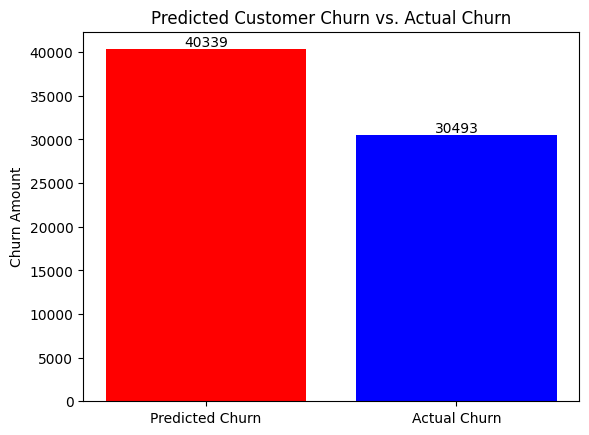

In [29]:
model = LogisticRegression()
model.fit(X_trainScaled,Y_train)

predictions = model.predict(X_testScaled)
actual = Y_test


predictions_count = np.count_nonzero(predictions == 1)
actual_count = np.count_nonzero(actual == 1)
labels = ['Predicted Churn', 'Actual Churn']
heights = [predictions_count, actual_count]
x = np.arange(len(labels))
plt.bar(x, heights,color=['red','blue'])
plt.xticks(x, labels)
plt.ylabel('Churn Amount')
plt.title("Predicted Customer Churn vs. Actual Churn")
for i, v in enumerate(heights):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()
